## DATA 144 Final Project: Spotify API

### Faizaan Merchant, Louie Ortiz, Aleks Faynleyb, Ryan Sandan

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import collections
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.manifold import TSNE

## Data Collection/Preprocessing

In [ ]:
df = pd.read_csv('songs.csv')
df

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Fight Night,No Label II,Migos,2014-06-03,216247,68,0.874,0.18200,0.874,0.706,0.000000,0.3340,-5.132,0.2070,89.968,4
1,1,Versace (Remix),Versace (feat. Drake) [Remix] - Single,Migos,2015-01-06,246047,59,0.845,0.02180,0.845,0.705,0.000000,0.3390,-4.271,0.2430,132.050,4
2,0,Love Songs - Bonus,Parked Car Convos,Kaash Paige,2019-11-15,148640,74,0.641,0.83100,0.641,0.355,0.000855,0.1100,-10.599,0.0906,120.032,4
3,1,Cognac Queen,Tina Snow,Megan Thee Stallion,2018-12-21,222752,74,0.790,0.05930,0.790,0.709,0.000000,0.0794,-5.806,0.2240,131.079,4
4,0,Wat U Sed (feat. Iamdoechii & Kal Banx),The House Is Burning,Isaiah Rashad,2021-07-30,176682,64,0.838,0.10100,0.838,0.634,0.130000,0.1430,-7.018,0.2580,163.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,90,"Work Hard, Play Hard (Radio Mix)","Work Hard, Play Hard",Tiësto,2011-08-15,236895,0,0.693,0.06830,0.693,0.806,0.002940,0.4620,-5.566,0.0705,127.045,4
4689,91,Escape Me - Avicii Remix,Kaleidoscope Remixed (Deluxe Edition),Tiësto,2010,460733,0,0.664,0.00922,0.664,0.695,0.521000,0.0162,-6.101,0.0457,128.005,4
4690,93,Wildfire,Wildfire,John Mayer,2013-07-16,253493,0,0.719,0.15000,0.719,0.665,0.000920,0.1440,-8.589,0.0331,96.999,4
4691,94,Uptown Girl,The Essential Billy Joel,Billy Joel,2001-10-02,194866,64,0.696,0.07360,0.696,0.943,0.000000,0.6530,-2.962,0.0431,129.003,4


In [ ]:
# Data Preprocessing
df = df.dropna(how = 'any')

# check if danceability is the same as danceability.1 
df['danceability'].equals(df['danceability.1'])
# outputs True, since the columns are the same, we remove the latter.
df = df.drop(['danceability.1', 'Unnamed: 0'], axis = 1).drop_duplicates(subset=['name', 'artist'], keep='first')
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Fight Night,No Label II,Migos,2014-06-03,216247,68,0.874,0.182000,0.706,0.000000,0.3340,-5.132,0.2070,89.968,4
1,Versace (Remix),Versace (feat. Drake) [Remix] - Single,Migos,2015-01-06,246047,59,0.845,0.021800,0.705,0.000000,0.3390,-4.271,0.2430,132.050,4
2,Love Songs - Bonus,Parked Car Convos,Kaash Paige,2019-11-15,148640,74,0.641,0.831000,0.355,0.000855,0.1100,-10.599,0.0906,120.032,4
3,Cognac Queen,Tina Snow,Megan Thee Stallion,2018-12-21,222752,74,0.790,0.059300,0.709,0.000000,0.0794,-5.806,0.2240,131.079,4
4,Wat U Sed (feat. Iamdoechii & Kal Banx),The House Is Burning,Isaiah Rashad,2021-07-30,176682,64,0.838,0.101000,0.634,0.130000,0.1430,-7.018,0.2580,163.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,She Doesn't Mind,Tomahawk Technique,Sean Paul,2012-04-09,227786,55,0.718,0.000624,0.776,0.000005,0.2070,-5.208,0.0693,120.015,4
4688,"Work Hard, Play Hard (Radio Mix)","Work Hard, Play Hard",Tiësto,2011-08-15,236895,0,0.693,0.068300,0.806,0.002940,0.4620,-5.566,0.0705,127.045,4
4689,Escape Me - Avicii Remix,Kaleidoscope Remixed (Deluxe Edition),Tiësto,2010,460733,0,0.664,0.009220,0.695,0.521000,0.0162,-6.101,0.0457,128.005,4
4691,Uptown Girl,The Essential Billy Joel,Billy Joel,2001-10-02,194866,64,0.696,0.073600,0.943,0.000000,0.6530,-2.962,0.0431,129.003,4


In [ ]:
# normalization/standardization/z-score? of data
# change popularity, length, tempo (leave others)

#Make a copy of DF
df_copy = df

#Standardize
cols = ['popularity', 'danceability','acousticness', 'energy', 'liveness', 'loudness', 'speechiness']
df_tr_std = stats.zscore(df_copy[cols])
X = np.array(df_tr_std)


## Exploratory Data Analysis

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Normalizing numeric features (that arent between 0-1) that we can work with
data = df[['length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
data

scaler = MinMaxScaler()
 
df_normalized = pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

df_normalized = df_normalized.loc[:,~df_normalized.columns.duplicated()]
df_normalized

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.044937,0.708333,0.889115,0.182731,0.712412,0.000000,0.341863,0.903746,0.225000,0.410193
1,0.051218,0.614583,0.859613,0.021888,0.711403,0.000000,0.346981,0.923073,0.264130,0.602058
2,0.030686,0.770833,0.652085,0.834337,0.358224,0.000866,0.112590,0.781028,0.098478,0.547264
3,0.046308,0.770833,0.803662,0.059538,0.715439,0.000000,0.081269,0.888617,0.243478,0.597631
4,0.036597,0.666667,0.852492,0.101406,0.639758,0.131712,0.146366,0.861411,0.280435,0.743169
...,...,...,...,...,...,...,...,...,...,...
4686,0.047369,0.572917,0.730417,0.000627,0.783047,0.000005,0.211873,0.902040,0.075326,0.547187
4688,0.049289,0.000000,0.704985,0.068574,0.813320,0.002979,0.472876,0.894004,0.076630,0.579239
4689,0.096470,0.000000,0.675483,0.009257,0.701312,0.527862,0.016581,0.881995,0.049674,0.583616
4691,0.040430,0.666667,0.708037,0.073896,0.951564,0.000000,0.668373,0.952457,0.046848,0.588166


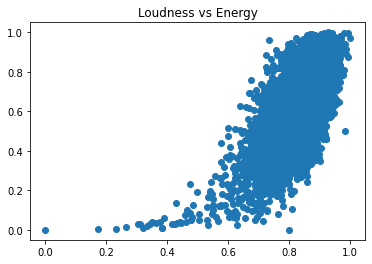

In [ ]:
plt.scatter(df_normalized['loudness'], df_normalized['energy'])
plt.title('Loudness vs Energy');

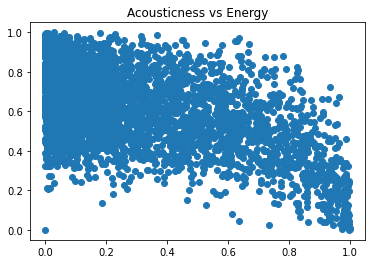

In [ ]:
plt.scatter(df_normalized['acousticness'], df_normalized['energy'])
plt.title('Acousticness vs Energy');

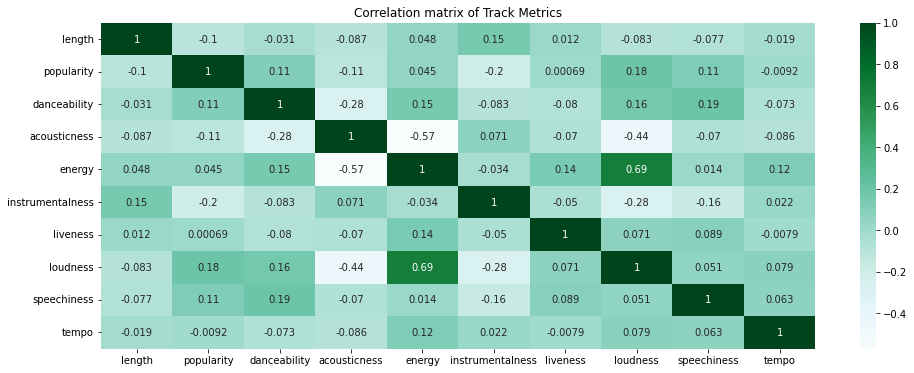

In [ ]:
# #finding correlation values between normalized features
corr = df_normalized.corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr, annot = True, cmap='BuGn')
# corr.style.background_gradient(cmap='coolwarm')

plt.title("Correlation matrix of Track Metrics");

In [ ]:
corr.unstack().sort_values(ascending=False).drop_duplicates()

length            length              1.000000
loudness          energy              0.687582
speechiness       danceability        0.187173
loudness          popularity          0.183994
danceability      loudness            0.164485
length            instrumentalness    0.148616
energy            danceability        0.147482
                  liveness            0.135140
tempo             energy              0.117850
speechiness       popularity          0.111889
popularity        danceability        0.107418
liveness          speechiness         0.088603
loudness          tempo               0.079321
acousticness      instrumentalness    0.071106
loudness          liveness            0.070591
speechiness       tempo               0.063307
                  loudness            0.050568
length            energy              0.048307
popularity        energy              0.045167
instrumentalness  tempo               0.022124
energy            speechiness         0.013907
length       

## Modeling

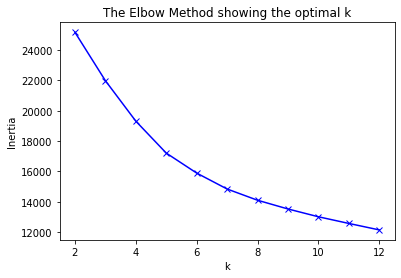

<Figure size 432x288 with 0 Axes>

In [ ]:
# Elbow Method; 5 clusters appears to be elbow point
metric_vals = []
K = range(2,13)
X = np.array(X)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(X)
    kmeans.fit(X)
    metric_vals.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K, metric_vals, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
plt.savefig('elbow.png')

In [ ]:
df_copy[:5]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Fight Night,No Label II,Migos,2014-06-03,216247,68,0.874,0.1820,0.706,0.000000,0.3340,-5.132,0.2070,89.968,4
1,Versace (Remix),Versace (feat. Drake) [Remix] - Single,Migos,2015-01-06,246047,59,0.845,0.0218,0.705,0.000000,0.3390,-4.271,0.2430,132.050,4
2,Love Songs - Bonus,Parked Car Convos,Kaash Paige,2019-11-15,148640,74,0.641,0.8310,0.355,0.000855,0.1100,-10.599,0.0906,120.032,4
3,Cognac Queen,Tina Snow,Megan Thee Stallion,2018-12-21,222752,74,0.790,0.0593,0.709,0.000000,0.0794,-5.806,0.2240,131.079,4
4,Wat U Sed (feat. Iamdoechii & Kal Banx),The House Is Burning,Isaiah Rashad,2021-07-30,176682,64,0.838,0.1010,0.634,0.130000,0.1430,-7.018,0.2580,163.000,4


In [ ]:
X

array([[ 1.22229383,  1.43970021, -0.26472354, ...,  1.01311297,
         0.80958055,  1.15869176],
       [ 0.90520332,  1.25131346, -0.8450708 , ...,  1.04638234,
         1.04533875,  1.53550681],
       [ 1.4336875 , -0.07388989,  2.08637118, ..., -0.47735486,
        -0.68738818, -0.05967691],
       ...,
       [-1.17350112,  0.07552029, -0.89064364, ..., -1.10148826,
         0.54424989, -0.52964902],
       [ 1.08136471,  0.28339532, -0.65741794, ...,  3.13569885,
         1.40376789, -0.55686344],
       [ 0.86997104, -0.29475712, -0.79000664, ..., -0.43743161,
         0.59216823,  0.14338453]])

In [ ]:
# Clustering w/ 5 clusters

kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
cluster_centers

cluster_center_table = pd.DataFrame({'cluster': [0, 1, 2, 3, 4],
              'popularity': [i[0] for i in cluster_centers], 
              'danceability': [i[1] for i in cluster_centers],
              'acousticness': [i[2] for i in cluster_centers], 
              'energy': [i[3] for i in cluster_centers], 
              'liveness': [i[4] for i in cluster_centers], 
              'loudness': [i[5] for i in cluster_centers], 
              'speechiness': [i[6] for i in cluster_centers]})

In [ ]:
labels

array([1, 1, 2, ..., 0, 4, 3], dtype=int32)

In [ ]:
cluster_center_table

,cluster,popularity,danceability,acousticness,energy,liveness,loudness,speechiness
0,0,-0.983684,0.070717,-0.331030,0.360561,-0.281367,0.134605,-0.316580
1,1,0.336386,0.452244,-0.123687,-0.159139,-0.044059,0.071848,2.251067
2,2,-0.263980,-0.771049,1.583152,-1.392613,-0.241925,-1.170296,-0.427440
3,3,0.913630,0.223364,-0.394886,0.307160,-0.280802,0.388740,-0.273080
4,4,-0.012150,-0.148042,-0.307753,0.516402,2.336055,0.260723,-0.017677


In [ ]:
data_dim = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(X)
cluster_centers_dim = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(cluster_centers)
cluster_centers_dim

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4539 samples in 0.005s...
[t-SNE] Computed neighbors for 4539 samples in 0.475s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4539
[t-SNE] Computed conditional probabilities for sample 2000 / 4539
[t-SNE] Computed conditional probabilities for sample 3000 / 4539
[t-SNE] Computed conditional probabilities for sample 4000 / 4539
[t-SNE] Computed conditional probabilities for sample 4539 / 4539
[t-SNE] Mean sigma: 0.582927
[t-SNE] Computed conditional probabilities in 0.404s
[t-SNE] Iteration 50: error = 82.2877350, gradient norm =

array([[  34.371773 ,  119.9762   ],
       [ -76.894196 ,  -59.62025  ],
       [  75.8542   ,    4.3786917],
       [  38.57077  , -112.64047  ],
       [ -79.1016   ,   62.819096 ]], dtype=float32)

In [ ]:
data_dim_x = [i[0] for i in data_dim]
data_dim_y = [i[1] for i in data_dim]
cluster_center_x = [i[0] for i in cluster_centers_dim]
cluster_center_y = [i[1] for i in cluster_centers_dim]
cluster_center_labels = [0, 1, 2, 3, 4]
cluster_center_table_dim_red = pd.DataFrame({'cluster_label': cluster_center_labels, 'cluster_center_x': cluster_center_x, 'cluster_center_y': cluster_center_y})
data_point_table = pd.DataFrame({'x': data_dim_x, 'y': data_dim_y, 'cluster': labels})
data_point_table['cluster_center_x'] = data_point_table['cluster'].map(dict(zip(cluster_center_labels, cluster_center_x)))
data_point_table['cluster_center_y'] = data_point_table['cluster'].map(dict(zip(cluster_center_labels, cluster_center_y)))
data_point_table

,x,y,cluster,cluster_center_x,cluster_center_y
0,-17.445332,-12.287695,1,-76.894196,-59.620251
1,-17.109545,-11.339351,1,-76.894196,-59.620251
2,26.229078,-24.275679,2,75.854202,4.378692
3,-20.419949,-45.650753,1,-76.894196,-59.620251
4,-15.005589,-47.357494,1,-76.894196,-59.620251
...,...,...,...,...,...
4534,-41.153347,3.797171,3,38.570770,-112.640472
4535,-18.517950,41.922306,4,-79.101601,62.819096
4536,17.977156,37.265091,0,34.371773,119.976196
4537,-31.320927,31.622601,4,-79.101601,62.819096


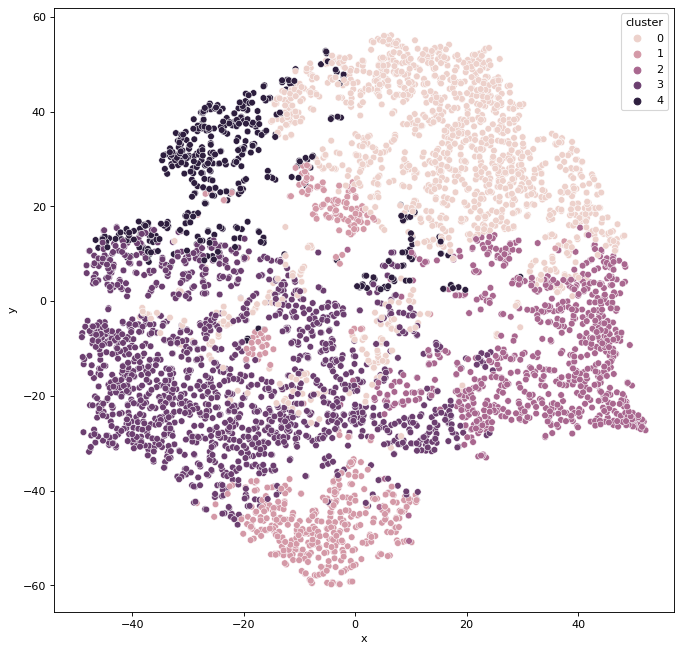

In [ ]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt


figure(figsize=(10, 10), dpi=80)
plot1 = sns.scatterplot(x=data_point_table['x'], y=data_point_table['y'], hue=data_point_table['cluster'])

plt.savefig('cluster_plot.png')

In [ ]:
import random
import string
!pip install spotipy
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
from tqdm import tqdm

# Input Spotify username, client API, and secret token
CLIENT_ID = '9e1d5603be8747858739991f6cb38661'
CLIENT_SECRET = '0a296f6fb0e34a3ea4bc8513f243797d'

# Authorization
sp = sp.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

def randSearchQuery():
    randChar = random.choice(string.ascii_letters)
    randSearch = ''
    randNum = random.randint(0, 1)

    if randNum == 0:
        randSearch = randChar + '%'
    else:
        randSearch = '%' + randChar + '%'

    return randSearch

def getRandomSongs():
    name = []
    album = []
    artist = []
    release_date = []
    length = []
    popularity = []
    danceability = []
    acousticness = []
    energy = []
    instrumentalness = []
    liveness = []
    loudness = []
    speechiness = []
    tempo = []
    time_signature = []

    for i in range(30):
        query = randSearchQuery()
        offset = random.randint(0, 500)

        randSongs = sp.search(query, limit=50, offset=offset, type='track')

        for j in randSongs['tracks']['items']:
            track_data = sp.track(j['uri'])
            name.append(track_data['name'])
            album.append(track_data['album']['name'])
            artist.append(track_data['artists'][0]['name'])
            release_date.append(track_data['album']['release_date'])
            length.append(track_data['duration_ms'])
            popularity.append(track_data['popularity'])
            audio_feature_data = sp.audio_features(j['uri'])[0]
            danceability.append(audio_feature_data['danceability'])
            acousticness.append(audio_feature_data['acousticness'])
            energy.append(audio_feature_data['energy'])
            instrumentalness.append(audio_feature_data['instrumentalness'])
            liveness.append(audio_feature_data['liveness'])
            loudness.append(audio_feature_data['loudness'])
            speechiness.append(audio_feature_data['speechiness'])
            tempo.append(audio_feature_data['tempo'])
            time_signature.append(audio_feature_data['time_signature'])

    return pd.DataFrame({'name': name, 'album': album, 'artist': artist, 'release_date': release_date, 'length': length,
             'popularity': popularity, 'danceability': danceability, 'acousticness': acousticness, 'energy': energy,
             'instrumentalness': instrumentalness, 'liveness': liveness, 'loudness': loudness, 'speechiness': speechiness,
             'tempo': tempo, 'time_signature': time_signature})
    
    

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
random_songs_df = getRandomSongs()

In [ ]:
random_songs_df = random_songs_df.drop_duplicates(subset=['name', 'artist'], keep='first')
random_songs_df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Kiwi,Harry Styles,Harry Styles,2017-05-12,176386,80,0.375,0.00064,0.930,0.000000,0.3180,-2.631,0.0561,147.124,4
1,The Christmas Song (Merry Christmas To You),The Christmas Song (Expanded Edition),Nat King Cole,1962,192160,88,0.319,0.92000,0.210,0.000081,0.1380,-15.231,0.0341,78.696,4
2,Kings & Queens,Heaven & Hell,Ava Max,2020-09-18,162398,84,0.637,0.00786,0.690,0.000000,0.1240,-4.057,0.0405,129.857,4
3,lovely (with Khalid),lovely (with Khalid),Billie Eilish,2018-04-19,200185,89,0.351,0.93400,0.296,0.000000,0.0950,-10.109,0.0333,115.284,4
4,Kickstart My Heart,Dr. Feelgood,Mötley Crüe,1989,282653,79,0.359,0.00125,0.981,0.002360,0.2840,-3.622,0.3030,178.980,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,"Bills, Bills, Bills",The Writing's On The Wall,Destiny's Child,1999-07-27,256026,78,0.845,0.13900,0.576,0.000000,0.0764,-5.150,0.1530,127.641,4
1495,Best Day Of My Life,"Oh, What A Life",American Authors,2014-01-01,194240,80,0.673,0.05910,0.902,0.000262,0.0558,-2.392,0.0346,100.012,4
1497,breadwinner,star-crossed,Kacey Musgraves,2021-09-10,200840,74,0.866,0.76900,0.508,0.000008,0.1100,-8.591,0.0580,117.951,4
1498,Best Part (feat. H.E.R.),Freudian,Daniel Caesar,2017-08-25,209831,79,0.524,0.80800,0.364,0.000000,0.1000,-10.209,0.0367,75.240,4


In [ ]:
column_names = ["name", "album", "artist", "distance"]

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return np.sqrt(distance)

#finds the distance to the closest cluster for a given song
def find_distance_from_centers(song, centers):
    distances = []
    for i in range(len(centers)):
        distance = euclidean_distance(song, centers.iloc[i, :])
        distances.append(distance)
    return min(distances)

#creates a dataframe that includes a best distant column
def near_cluster_centers(centers, songs):
    songs_distances = pd.DataFrame(columns = column_names)
    for i in range(len(songs)):
        song_trimmed = songs.iloc[i,5:12]
        best_distance = find_distance_from_centers(song_trimmed, centers)
        
        songs_distances.loc[i, "name"] = songs.iloc[i,0]
        songs_distances.loc[i, "album"] = songs.iloc[i,1]
        songs_distances.loc[i, "artist"] = songs.iloc[i,2]
        songs_distances.loc[i, "distance"] = best_distance

    return songs_distances

distance_df = near_cluster_centers(cluster_center_table, random_songs_df)
distance_df.sort_values("distance")


,name,album,artist,distance
1090,"Die Zauberflöte, K. 620 / Act 1: ""Der Vogelfän...",Grands airs d'opéra,Wolfgang Amadeus Mozart,0.6632
817,Yummy,Kids Day Out,Justin Bieber,0.758692
1114,"Christmas Oratorio, BWV 248 / Part Six - For T...",Messiah and other Xmas Essentials,Johann Sebastian Bach,1.124371
951,Happier Than Ever,2021 Wrap Up,Billie Eilish,1.129923
1091,"Die Zauberflöte, K. 620, Act I: ""Bei Männern, ...",Classical Masters: Opera,Wolfgang Amadeus Mozart,1.153419
...,...,...,...,...
692,Do It To It,Do It To It,ACRAZE,90.040916
157,THATS WHAT I WANT,MONTERO,Lil Nas X,90.041187
666,Bad Habits,=,Ed Sheeran,91.034597
566,Shivers,=,Ed Sheeran,91.04237


In [ ]:
cluster_0 = data_point_table[data_point_table['cluster'] == 0]
cluster_1 = data_point_table[data_point_table['cluster'] == 1]
cluster_2 = data_point_table[data_point_table['cluster'] == 2]
cluster_3 = data_point_table[data_point_table['cluster'] == 3]
cluster_4 = data_point_table[data_point_table['cluster'] == 4]

cluster_0

,x,y,cluster,cluster_center_x,cluster_center_y
74,32.310635,22.459270,0,34.371773,119.976196
86,17.394627,27.765789,0,34.371773,119.976196
93,33.356842,34.180683,0,34.371773,119.976196
104,0.093863,30.994633,0,34.371773,119.976196
120,-8.287637,-25.734016,0,34.371773,119.976196
...,...,...,...,...,...
4529,25.470423,41.405006,0,34.371773,119.976196
4530,-6.923534,47.152481,0,34.371773,119.976196
4532,40.717369,26.279736,0,34.371773,119.976196
4533,-11.289513,41.311134,0,34.371773,119.976196


In [ ]:
song_info = df[["name", "album", "artist", "release_date"]]

In [ ]:
result_0 = cluster_0.join(song_info)[["name", "album", "artist", "release_date"]].dropna(how = 'any')
result_1 = cluster_1.join(song_info)[["name", "album", "artist", "release_date"]].dropna(how = 'any')
result_2 = cluster_2.join(song_info)[["name", "album", "artist", "release_date"]].dropna(how = 'any')
result_3 = cluster_3.join(song_info)[["name", "album", "artist", "release_date"]].dropna(how = 'any')
result_4 = cluster_4.join(song_info)[["name", "album", "artist", "release_date"]].dropna(how = 'any')

In [ ]:
result_0

,name,album,artist,release_date
74,Baby Powder,Baby Powder,Jenevieve,2020-03-25
86,So Many Details,So Many Details / So Many Details Remix,Toro y Moi,2012-12-04
93,Beautiful,Paid Tha Cost To Be Da Bo$$,Snoop Dogg,2002-01-01
104,Don't Wanna Fight,Sound & Color,Alabama Shakes,2015-04-21
120,Neighborhood Hoochie (Remix),Neighborhood Hoochie (Remix),MCM Raymond,2020-06-19
...,...,...,...,...
4529,Lonely Tonight (feat. Ashley Monroe),BRINGING BACK THE SUNSHINE,Blake Shelton,2014-09-30
4530,Eyes Shut,Communion (Deluxe),Years & Years,2015-07-10
4532,C'Mon (Catch 'Em By Surprise) [feat. Busta Rhy...,C'Mon (Catch 'Em By Surprise) [feat. Busta Rhy...,Tiësto,2011-01-24
4533,Seek Bromance (Avicii Vocal Edit),Seek Bromance,Tim Berg,2010-11-12


In [ ]:
result_1

,name,album,artist,release_date
0,Fight Night,No Label II,Migos,2014-06-03
1,Versace (Remix),Versace (feat. Drake) [Remix] - Single,Migos,2015-01-06
3,Cognac Queen,Tina Snow,Megan Thee Stallion,2018-12-21
4,Wat U Sed (feat. Iamdoechii & Kal Banx),The House Is Burning,Isaiah Rashad,2021-07-30
5,MOOO!,Amala (Deluxe Version),Doja Cat,2019-03-01
...,...,...,...,...
4424,Trap Queen,Trap Queen,Fetty Wap,2014-12-15
4457,Geronimo,Geronimo,Sheppard,2014-01-01
4458,One Heart/Million Voices,Symmetry,New Empire,2011-09-16
4513,When It's Alright - Tomcraft Radio Edit,When It's Alright,Sam Smith,2014-07-11


In [ ]:
result_2

,name,album,artist,release_date
2,Love Songs - Bonus,Parked Car Convos,Kaash Paige,2019-11-15
34,Give It Up 2 Me,B4 I Breakdown,Ojerime,2020-03-13
36,Shine,Shine,Cleo Sol,2020-07-17
37,Young Love,Rose in the Dark,Cleo Sol,2020-03-27
43,Sum Change,Sum Change,Mundane,2021-09-02
...,...,...,...,...
4367,Have Yourself a Merry Little Christmas,Winter Loversland,Tamar Braxton,2013-11-11
4461,Smile,Smile,Mikky Ekko,2014-08-15
4463,This Is How I Feel,Illumination,"Earth, Wind & Fire",2005
4496,Not a Bad Thing,Not a Bad Thing,Justin Timberlake,2014-02-24


In [ ]:
result_3

,name,album,artist,release_date
7,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,Amaarae,2021-09-16
11,SICKO MODE,ASTROWORLD,Travis Scott,2018-08-03
13,Reason,to hell with it,PinkPantheress,2021-10-15
14,Charmander,Charmander,Aminé,2021-10-25
17,Swangin’ On Westheimer,Life of a DON,Don Toliver,2021-10-08
...,...,...,...,...
4519,Faith,Motion,Calvin Harris,2014-10-31
4526,Earthquake (feat. Tinie Tempah),Beneath Your Beautiful,Labrinth,2013-08-27
4531,Raise Up,Diary of a Sinner: 1st Entry,Petey Pablo,2001
4534,I'm Into You,LOVE?,Jennifer Lopez,2011-01-01


In [ ]:
result_4

,name,album,artist,release_date
29,4Ever (feat. Fabolous),4 Ever (feat. Fabolous),Lil' Mo,2003-02-11
40,Why Won't You Make Up Your Mind?,InnerSpeaker,Tame Impala,2010-05-21
51,Monster,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22
53,Thriller,Scream,Michael Jackson,2017-09-27
63,Essence (feat. Tems),Made In Lagos,WizKid,2020-10-29
...,...,...,...,...
4520,Blame (feat. John Newman),Motion,Calvin Harris,2014-10-31
4521,Together (feat. Gwen Stefani),Motion,Calvin Harris,2014-10-31
4527,Flawless Remix (feat. Nicki Minaj),BEYONCÉ [Platinum Edition],Beyoncé,2014-11-24
4535,Don't Wanna Go Home,Don't Wanna Go Home,Jason Derulo,2011-05-20


In [ ]:
result_4_genres = []
result_4 = result_4.reset_index()
result_4

,index,name,album,artist,release_date
0,29,4Ever (feat. Fabolous),4 Ever (feat. Fabolous),Lil' Mo,2003-02-11
1,40,Why Won't You Make Up Your Mind?,InnerSpeaker,Tame Impala,2010-05-21
2,51,Monster,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22
3,53,Thriller,Scream,Michael Jackson,2017-09-27
4,63,Essence (feat. Tems),Made In Lagos,WizKid,2020-10-29
...,...,...,...,...,...
408,4520,Blame (feat. John Newman),Motion,Calvin Harris,2014-10-31
409,4521,Together (feat. Gwen Stefani),Motion,Calvin Harris,2014-10-31
410,4527,Flawless Remix (feat. Nicki Minaj),BEYONCÉ [Platinum Edition],Beyoncé,2014-11-24
411,4535,Don't Wanna Go Home,Don't Wanna Go Home,Jason Derulo,2011-05-20


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f90032f2-fe5a-454a-bb0f-8f96c0ca7e2a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>